In [5]:
import napari
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects
import matplotlib.pyplot as plt

In [ ]:


coins = data.coins()[50:-50, 50:-50]
# apply threshold
thresh = threshold_otsu(coins)
bw = closing(coins > thresh, square(4))
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 20)
# label image regions
label_image = label(cleared)

# create the viewer and add the coins image
viewer = napari.view_image(coins, name='coins')
# add the labels
labels_layer = viewer.add_labels(label_image, name='segmentation')

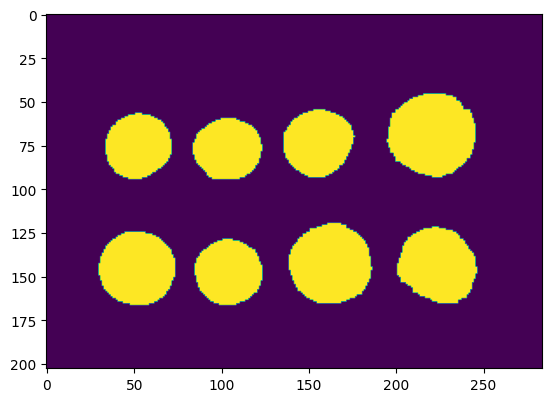

In [6]:
plt.imshow(cleared)

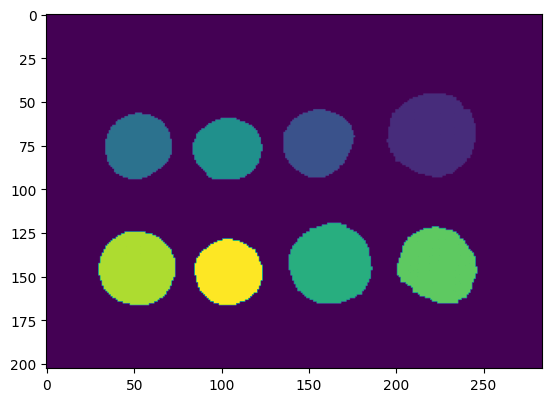

In [7]:
plt.imshow(label_image)

In [2]:
cleared

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
label_image.max()

8